from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))

In [41]:
import sys, subprocess, importlib.metadata, platform, lifelines
print(platform.python_version(), lifelines.__version__)

3.10.18 0.30.0


In [42]:
import importlib.util, sys, pathlib
subprocess.check_call([sys.executable, "-m", "pip", "install", "--quiet", "openpyxl"])
script = pathlib.Path("/projectnb/evolution/zwakefield/tcga/TERTsnp_yunwei/tert_snp_survival.py")
spec   = importlib.util.spec_from_file_location("tert_snp_survival", script)
mod    = importlib.util.module_from_spec(spec)
sys.modules[spec.name] = mod
spec.loader.exec_module(mod)

# Now call it
mod.main()

SyntaxError: invalid decimal literal (tert_snp_survival.py, line 31)

NameError: name 'df' is not defined

In [26]:
clin = pd.read_csv("/projectnb2/evolution/zwakefield/tcga/sir_analysis/harmonized/clinical_harmonized_numeric.csv")
snps = pd.read_excel("/projectnb/evolution/zwakefield/tcga/TERTsnp_yunwei/TCGA_TERT_SNP_IDs.xlsx")
clin

,File.ID,Project.ID,Case.ID,Sample.ID,Sample.Type,primary_diagnosis,age_at_diagnosis,race,stage,OS.time,OS.event,gender,stage_code,gender_code,race_code,dx_code,Project.ID_code
0,5922a02f-265c-4c38-b950-9fdb3e270d86,TCGA-SARC,TCGA-FX-A3RE,TCGA-FX-A3RE-01A,Primary Tumor,"Leiomyosarcoma, NOS",65,White,is_missing,660,0,female,1.0,0.0,2.0,62.0,25
1,0f6f5b43-83bd-4605-a182-c3a1b9d2b035,TCGA-OV,TCGA-13-1489,TCGA-13-1489-01A,Primary Tumor,"Serous cystadenocarcinoma, NOS",61,is_missing,is_missing,2553,1,female,1.0,0.0,3.0,110.0,20
2,de9fd356-83bf-4b11-ad6f-d905f39d93cf,TCGA-OV,TCGA-61-2101,TCGA-61-2101-01A,Primary Tumor,"Serous cystadenocarcinoma, NOS",61,is_missing,is_missing,1688,1,female,1.0,0.0,3.0,110.0,20
3,eac61c13-7d3c-48cf-a50a-8a379026df5a,TCGA-OV,TCGA-13-0893,TCGA-13-0893-01B,Primary Tumor,"Serous cystadenocarcinoma, NOS",61,is_missing,is_missing,1319,1,female,1.0,0.0,3.0,110.0,20
4,753711cc-0ef3-4a53-b421-f1a1ef80f004,TCGA-OV,TCGA-13-1404,TCGA-13-1404-01A,Primary Tumor,"Serous cystadenocarcinoma, NOS",61,is_missing,is_missing,2469,0,female,1.0,0.0,3.0,110.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10096,bca301cd-4856-481c-8c7f-9d746eb60959,TCGA-TGCT,TCGA-VF-A8AD,TCGA-VF-A8AD-01A,Primary Tumor,"Embryonal carcinoma, NOS",37,White,Stage IB,1006,0,male,1.0,1.0,2.0,40.0,28
10097,e22b4dc9-f5d5-4770-a4a1-767af6bcaea3,TCGA-TGCT,TCGA-4K-AA1I,TCGA-4K-AA1I-01A,Primary Tumor,"Seminoma, NOS",27,White,Stage IA,3,0,male,1.0,1.0,2.0,109.0,28
10098,fa27fc61-6c5c-46d0-936f-bb893d197237,TCGA-TGCT,TCGA-S6-A8JX,TCGA-S6-A8JX-01A,Primary Tumor,"Seminoma, NOS",27,White,Stage IB,552,0,male,1.0,1.0,2.0,109.0,28
10099,635f571f-62b2-4a92-8224-876f47ea6363,TCGA-TGCT,TCGA-SO-A8JP,TCGA-SO-A8JP-01A,Primary Tumor,"Seminoma, NOS",29,White,Stage I,540,0,male,1.0,1.0,2.0,109.0,28


In [102]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test
%pip install statsmodels
from statsmodels.stats.multitest import multipletests
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.5 requires cachetools>=4.2.1, which is not installed.
pymc3 3.11.5 requires dill, which is not installed.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.26.4 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.15.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [125]:
import pandas as pd
p = "/projectnb/evolution/zwakefield/tcga/TERTsnp_yunwei/tert_data.csv"
tert_tcga = pd.read_csv(p)
print(tert_tcga.shape)
tert_tcga.columns = ["V1"] + [c.replace(".", "-") for c in tert_tcga.columns[1:]]
tert_tcga.columns = tert_tcga.columns.str.replace(r"^X", "", regex=True)
AS_one_gene = tert_tcga.iloc[:, :-1]
clin_ids = (
    clin["File.ID"]
    .astype("string")
    .str.strip()
)

id_col = AS_one_gene.columns[0]
as_cols = AS_one_gene.columns.astype("string").str.strip()

# 2) keep only overlapping sample columns
sample_cols = [c for c in as_cols[1:] if c in set(clin_ids)]
AS_keep = AS_one_gene.loc[:, [id_col] + sample_cols].copy()
print(AS_keep.shape)

# 3) (optional) reorder sample columns to match clin order
ordered_samples = [s for s in clin_ids if s in sample_cols]
AS_aligned = AS_keep.loc[:, [id_col] + ordered_samples].copy()



(42, 10433)
(42, 10074)


In [126]:
AS_aligned = AS_aligned.rename(columns={AS_aligned.columns[0]: "id_new"})

In [127]:
import re
import pandas as pd

# --- config: tweak only if your clinical names differ ---
CLIN_SAMPLE = "File.ID"

# ---------- helpers ----------
EVENT_TYPES = ("AFE","ALE","SE","RI","MXE","A5SS","A3SS","CO","CE")  # extend if needed

def parse_coords(ev: str) -> str:
    """Return genomic coordinates-ish part of the event string."""
    if not isinstance(ev, str):
        return str(ev)
    # many of your ids look like 'ENSG...#chrX:...'; take the part after '#'
    if "#" in ev:
        return ev.split("#", 1)[1]
    # fallback: strip gene version if present 'ENSG... .xx'
    return re.sub(r"^ENSG\d+(?:\.\d+)?[:#]?", "", ev)

def parse_class(ev: str) -> str:
    """Best-effort grab an event class token if present (AFE/ALE/SE/RI/...)."""
    if not isinstance(ev, str):
        return "NA"
    m = re.search(r"\b(" + "|".join(EVENT_TYPES) + r")\b", ev)
    return m.group(1) if m else "NA"

# ---------- reshape, join, and build ids ----------
def as_long_joined(AS_aligned: pd.DataFrame, clin: pd.DataFrame) -> pd.DataFrame:
    # detect event id source
    if "id_new" in AS_aligned.columns:
        wide = AS_aligned.set_index("id_new")
    else:
        wide = AS_aligned.copy()
        # if the index are integers 0,1,2 but you *do* have true ids somewhere else,
        # replace here; otherwise we'll use these as-is.
        wide.index.name = "id_new"

    # melt to long: (event_id, File.ID, psi)
    AS_long = (
        wide.reset_index()
            .melt(id_vars=["id_new"], var_name=CLIN_SAMPLE, value_name="psi")
            .dropna(subset=["psi"])
    )

    # parse coords & class from the original id string
    AS_long["coords"] = AS_long["id_new"].astype(str).map(parse_coords)
    AS_long["class"]  = AS_long["id_new"].astype(str).map(parse_class)

    # make the **new** id = locations + class
    # AS_long["id_new"] = AS_long["coords"] + "|" + AS_long["class"]

    # join to clinical
    keep_cols = [CLIN_SAMPLE, "OS.time", "OS.event", "Project.ID", "gender_code", "age_at_diagnosis", "race"]
    keep_cols = [c for c in keep_cols if c in clin.columns]
    joined = AS_long.merge(clin[keep_cols], on=CLIN_SAMPLE, how="inner")

    # tidy order
    cols = ["id_new", "coords", "class", CLIN_SAMPLE, "psi"] + [c for c in keep_cols if c != CLIN_SAMPLE]
    cols = [c for c in cols if c in joined.columns]

    

    return joined.loc[:, cols]

# ---- run it ----
LONG = as_long_joined(AS_aligned, clin)
LONG["race"] = LONG["race"].replace({"Asian":"Other", "Black":"Other", "is_missing":"Other"})
print(LONG.shape)
LONG.head()


(423066, 11)


,id_new,coords,class,File.ID,psi,OS.time,OS.event,Project.ID,gender_code,age_at_diagnosis,race
0,ENSG00000164362.21;chr5;-;1278640;1278796;1278...,;chr5;-;1278640;1278796;1278640;1278760;127929...,NA,5922a02f-265c-4c38-b950-9fdb3e270d86,0.0,660,0,TCGA-SARC,0.0,65,White
1,ENSG00000164362.21;chr5;-;1292963;1294666;1293...,;chr5;-;1292963;1294666;1293312;1294666;128242...,NA,5922a02f-265c-4c38-b950-9fdb3e270d86,0.0,660,0,TCGA-SARC,0.0,65,White
2,ENSG00000164362.21;chr5;-;1292963;1294666;1293...,;chr5;-;1292963;1294666;1293312;1294666;128616...,NA,5922a02f-265c-4c38-b950-9fdb3e270d86,0.0,660,0,TCGA-SARC,0.0,65,White
3,ENSG00000164362.21;chr5:1260474-1260600;-;afe,;chr5:1260474-1260600;-;afe,NA,5922a02f-265c-4c38-b950-9fdb3e270d86,0.0,660,0,TCGA-SARC,0.0,65,White
4,ENSG00000164362.21;chr5:1271119-1271204;-;afe,;chr5:1271119-1271204;-;afe,NA,5922a02f-265c-4c38-b950-9fdb3e270d86,0.0,660,0,TCGA-SARC,0.0,65,White


In [128]:
from pathlib import Path

out_dir = Path("")
out_dir.mkdir(parents=True, exist_ok=True)

# Parquet (fast, preserves types) — recommended
LONG.to_parquet(out_dir / "AS_long_joined.parquet", index=False)

# Also a CSV for eyeballing
LONG.to_csv(out_dir / "AS_long_joined.csv", index=False)

In [129]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test
from statsmodels.stats.multitest import multipletests
import numpy as np
long_df_use = pd.read_csv('/projectnb2/evolution/zwakefield/tcga/TERTsnp_yunwei/AS_long_joined.csv')

print('wtf')

wtf


In [130]:
import pandas as pd, numpy as np

# assuming df has id_new, Project.ID, psi
def summarize_psi(df):
    stats = []
    for ev, sub in df.groupby("id_new", observed=True):
        nonzero = sub.loc[sub["psi"] > 0, "psi"]
        cancers = sub.loc[sub["psi"] > 0, "Project.ID"].unique().tolist()
        stats.append({
            "id_new": ev,
            "n_total": len(sub),
            "n_nonzero": len(nonzero),
            "frac_nonzero": len(nonzero) / len(sub) if len(sub) else np.nan,
            "psi_mean_nonzero": nonzero.mean() if len(nonzero) else np.nan,
            "psi_median_nonzero": nonzero.median() if len(nonzero) else np.nan,
            "psi_max": sub["psi"].max(),
            "psi_min": sub["psi"].min(),
            "n_cancers_nonzero": len(cancers),
            "cancers_nonzero": ", ".join(sorted(cancers)),
        })
    return pd.DataFrame(stats)

# psi_summary = summarize_psi(LONG)
# display(psi_summary)


,id_new,n_total,n_nonzero,frac_nonzero,psi_mean_nonzero,psi_median_nonzero,psi_max,psi_min,n_cancers_nonzero,cancers_nonzero
0,ENSG00000164362.21;chr5:1253147-1253831;-;ale,10073,365,0.036235,0.985509,1.000000,1.000000,0.0,26,"TCGA-ACC, TCGA-BLCA, TCGA-BRCA, TCGA-CESC, TCG..."
1,ENSG00000164362.21;chr5:1254368-1254505;-;afe,10073,7,0.000695,0.846745,1.000000,1.000000,0.0,6,"TCGA-COAD, TCGA-KIRC, TCGA-LUSC, TCGA-OV, TCGA..."
2,ENSG00000164362.21;chr5:1254617-1254664;-;afe,10073,31,0.003078,0.714234,1.000000,1.000000,0.0,2,"TCGA-COAD, TCGA-READ"
3,ENSG00000164362.21;chr5:1254617-1254664;-;ale,10073,3,0.000298,0.219032,0.092896,0.478261,0.0,3,"TCGA-BRCA, TCGA-LIHC, TCGA-THYM"
4,ENSG00000164362.21;chr5:1255287-1255411;-;afe,10073,36,0.003574,0.849352,1.000000,1.000000,0.0,5,"TCGA-COAD, TCGA-PAAD, TCGA-READ, TCGA-STAD, TC..."
5,ENSG00000164362.21;chr5:1255287-1255411;-;ale,10073,14,0.001390,0.808780,1.000000,1.000000,0.0,4,"TCGA-GBM, TCGA-LUSC, TCGA-OV, TCGA-STAD"
6,ENSG00000164362.21;chr5:1258598-1258659;-;ale,10073,1,0.000099,1.000000,1.000000,1.000000,0.0,1,TCGA-UCS
7,ENSG00000164362.21;chr5:1260474-1260600;-;afe,10073,23,0.002283,0.950146,1.000000,1.000000,0.0,11,"TCGA-BLCA, TCGA-ESCA, TCGA-GBM, TCGA-KIRC, TCG..."
8,ENSG00000164362.21;chr5:1266464-1266535;-;afe,10073,1,0.000099,1.000000,1.000000,1.000000,0.0,1,TCGA-OV
9,ENSG00000164362.21;chr5:1271119-1271204;-;afe,10073,1,0.000099,1.000000,1.000000,1.000000,0.0,1,TCGA-BLCA


In [131]:
import pandas as pd

# Assume your dataframe is called LONG and has columns: id_new, Project.ID, psi
df = LONG.copy()

# --- Step 1: ensure psi is numeric ---
df["psi"] = pd.to_numeric(df["psi"], errors="coerce").fillna(0)

# --- Step 2: count nonzero psi per (id_new, Project.ID) ---
counts = (
    df.groupby(["id_new", "Project.ID"], observed=True)["psi"]
      .apply(lambda x: (x > 0).sum())
      .reset_index(name="nonzero_count")
)

# --- Step 3: mark ids that have ≥5 nonzero psi in ANY cancer type ---
valid_ids = (
    counts.loc[counts["nonzero_count"] >= 10, "id_new"]
    .drop_duplicates()
)

# --- Step 4: keep only those rows ---
df_filtered = df[df["id_new"].isin(valid_ids)].copy()

print(f"Kept {df_filtered['id_new'].nunique()} ids (out of {df['id_new'].nunique()})")
print(f"Remaining rows: {len(df_filtered):,}")

# Optional sanity check: how many cancer types per id_new survived
summary = (
    counts[counts["id_new"].isin(valid_ids)]
    .groupby("id_new")["Project.ID"].nunique()
    .reset_index(name="num_cancers_with_≥5_nonzero")
)
print(summary.head())

Kept 10 ids (out of 42)
Remaining rows: 100,730
                                              id_new  \
0      ENSG00000164362.21;chr5:1253147-1253831;-;ale   
1      ENSG00000164362.21;chr5:1254617-1254664;-;afe   
2      ENSG00000164362.21;chr5:1255287-1255411;-;afe   
3  ENSG00000164362.21;chr5;-;1264403;1264592;1260...   
4  ENSG00000164362.21;chr5;-;1278640;1278796;1278...   

   num_cancers_with_≥5_nonzero  
0                           33  
1                           33  
2                           33  
3                           33  
4                           33  


In [134]:
LONG = df_filtered
psi_summary = summarize_psi(LONG)
display(psi_summary)

,id_new,n_total,n_nonzero,frac_nonzero,psi_mean_nonzero,psi_median_nonzero,psi_max,psi_min,n_cancers_nonzero,cancers_nonzero
0,ENSG00000164362.21;chr5:1253147-1253831;-;ale,10073,365,0.036235,0.985509,1.000,1.000,0.0,26,"TCGA-ACC, TCGA-BLCA, TCGA-BRCA, TCGA-CESC, TCG..."
1,ENSG00000164362.21;chr5:1254617-1254664;-;afe,10073,31,0.003078,0.714234,1.000,1.000,0.0,2,"TCGA-COAD, TCGA-READ"
2,ENSG00000164362.21;chr5:1255287-1255411;-;afe,10073,36,0.003574,0.849352,1.000,1.000,0.0,5,"TCGA-COAD, TCGA-PAAD, TCGA-READ, TCGA-STAD, TC..."
3,ENSG00000164362.21;chr5;-;1264403;1264592;1260...,10073,4394,0.436216,0.963397,1.000,1.000,0.0,33,"TCGA-ACC, TCGA-BLCA, TCGA-BRCA, TCGA-CESC, TCG..."
4,ENSG00000164362.21;chr5;-;1278640;1278796;1278...,10073,3940,0.391145,0.957361,1.000,1.000,0.0,33,"TCGA-ACC, TCGA-BLCA, TCGA-BRCA, TCGA-CESC, TCG..."
5,ENSG00000164362.21;chr5;-;1286164;1287086;1282...,10073,214,0.021245,0.440201,0.429,0.905,0.0,25,"TCGA-ACC, TCGA-BLCA, TCGA-BRCA, TCGA-CESC, TCG..."
6,ENSG00000164362.21;chr5;-;1286164;1287086;1282...,10073,103,0.010225,0.490214,0.333,1.000,0.0,20,"TCGA-ACC, TCGA-BLCA, TCGA-BRCA, TCGA-CESC, TCG..."
7,ENSG00000164362.21;chr5;-;1292963;1294666;1293...,10073,444,0.044078,0.624640,0.600,1.000,0.0,29,"TCGA-ACC, TCGA-BLCA, TCGA-BRCA, TCGA-CESC, TCG..."
8,ENSG00000164362.21;chr5;-;1292963;1294666;1293...,10073,78,0.007743,0.573231,0.600,0.966,0.0,18,"TCGA-ACC, TCGA-BLCA, TCGA-BRCA, TCGA-CESC, TCG..."
9,ENSG00000164362.21;chr5;-;1293312;1294666;1282...,10073,56,0.005559,0.591589,0.600,0.943,0.0,20,"TCGA-BLCA, TCGA-BRCA, TCGA-CESC, TCGA-COAD, TC..."


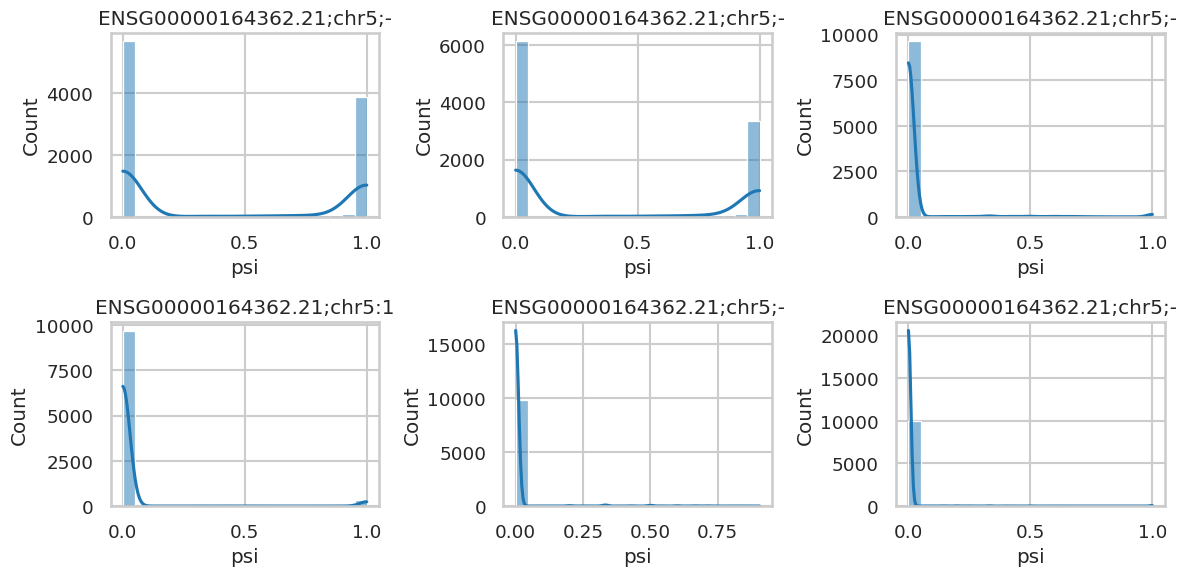

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
top_ev = psi_summary.sort_values("frac_nonzero", ascending=False).head(6)["id_new"]

fig, axes = plt.subplots(2, 3, figsize=(12,6))
for ax, ev in zip(axes.ravel(), top_ev):
    sub = LONG[LONG["id_new"] == ev]
    sns.histplot(sub["psi"], bins=20, kde=True, ax=ax)
    ax.set_title(ev[:25])
plt.tight_layout()
plt.show()

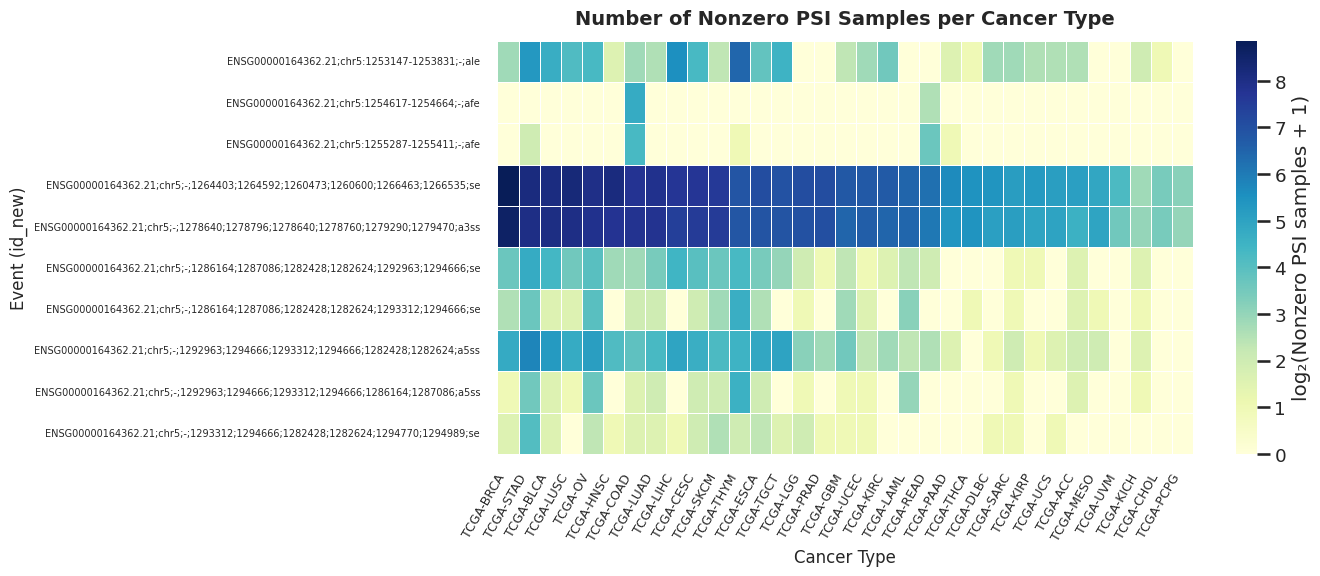

Saved improved figure as: /projectnb2/evolution/zwakefield/tcga/TERTsnp_yunwei/output/nonzero_psi_heatmap.svg


In [198]:
plt.figure(figsize=(14, 6))

# Sort cancers by total nonzero count for better ordering
pivot_sorted = pivot.loc[:, pivot.sum().sort_values(ascending=False).index]

sns.heatmap(
    np.log2(pivot_sorted + 1),
    cmap="YlGnBu",
    linewidths=0.4,
    linecolor="white",
    cbar_kws={"label": "log₂(Nonzero PSI samples + 1)"},
)

plt.title("Number of Nonzero PSI Samples per Cancer Type", fontsize=14, weight="bold", pad=12)
plt.xlabel("Cancer Type", fontsize=12)
plt.ylabel("Event (id_new)", fontsize=12)

# Improve tick readability
plt.xticks(rotation=60, ha="right", fontsize=9)
plt.yticks(fontsize=7)

# Tight layout and save as SVG
plt.tight_layout()
out_svg = "/projectnb2/evolution/zwakefield/tcga/TERTsnp_yunwei/output/nonzero_psi_heatmap.svg"
plt.savefig(out_svg, format="svg", bbox_inches="tight")
plt.show()

print(f"Saved improved figure as: {out_svg}")

In [145]:
LONG['id_new'].unique()

array(['ENSG00000164362.21;chr5;-;1278640;1278796;1278640;1278760;1279290;1279470;a3ss',
       'ENSG00000164362.21;chr5;-;1292963;1294666;1293312;1294666;1282428;1282624;a5ss',
       'ENSG00000164362.21;chr5;-;1292963;1294666;1293312;1294666;1286164;1287086;a5ss',
       'ENSG00000164362.21;chr5:1254617-1254664;-;afe',
       'ENSG00000164362.21;chr5:1255287-1255411;-;afe',
       'ENSG00000164362.21;chr5:1253147-1253831;-;ale',
       'ENSG00000164362.21;chr5;-;1264403;1264592;1260473;1260600;1266463;1266535;se',
       'ENSG00000164362.21;chr5;-;1286164;1287086;1282428;1282624;1292963;1294666;se',
       'ENSG00000164362.21;chr5;-;1286164;1287086;1282428;1282624;1293312;1294666;se',
       'ENSG00000164362.21;chr5;-;1293312;1294666;1282428;1282624;1294770;1294989;se'],
      dtype=object)

In [195]:
# surv_event_cox_km.py
# Requires: pandas, numpy, matplotlib, lifelines
from __future__ import annotations

import argparse
from pathlib import Path
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts

# ================== USER CONFIG ==================
ID_COL         = "id_new"            # event identifier
SAMPLE         = "File.ID"
TIME           = "OS.time"
EVENT          = "OS.event"
CANCER         = "Project.ID"
SEX            = "gender_code"       # can be string or numeric; coerced to categorical
AGE            = "age_at_diagnosis"
RACE           = "race"              # coerced to categorical
PSI            = "psi"

PENALIZER      = 0.5                 # ridge for numerical stability
KM_MIN_PER_GRP = 5                   # skip KM if either group too small
ALPHA_INT      = 0.05                # significance threshold for psi×cancer
BASELINE_CANCER= None                # set to a cancer name to force baseline; else first alphabetical present
RANDOM_SEED    = 123

# ================== HELPERS ==================
def ensure_columns(df: pd.DataFrame) -> None:
    need = {ID_COL, SAMPLE, TIME, EVENT, CANCER, SEX, AGE, RACE, PSI}
    missing = need - set(df.columns)
    if missing:
        raise ValueError(f"Missing required columns: {sorted(missing)}")

def drop_nonfinite_and_sort(df: pd.DataFrame) -> pd.DataFrame:
    d = df.copy()
    d = d.replace([np.inf, -np.inf], np.nan)
    d = d.dropna(subset=[TIME, EVENT, PSI, AGE, SEX, RACE, CANCER, ID_COL])
    # ensure types
    d[TIME] = pd.to_numeric(d[TIME], errors="coerce")
    d[EVENT] = pd.to_numeric(d[EVENT], errors="coerce").astype(int)
    d[AGE] = pd.to_numeric(d[AGE], errors="coerce")
    d = d.dropna(subset=[TIME, EVENT, AGE])
    d = d.sort_values([ID_COL, CANCER, SAMPLE])
    return d

def encode_categoricals(dfe: pd.DataFrame) -> pd.DataFrame:
    d = dfe.copy()
    # standardize categorical columns as strings, then categorical
    for col in [SEX, RACE, CANCER]:
        d[col] = d[col].astype(str)
        d[col] = pd.Categorical(d[col])
    return d

def cancers_with_nonconstant_psi(dfe: pd.DataFrame) -> set[str]:
    # per cancer, keep if psi variance > 0 for the event
    g = dfe.groupby(CANCER, observed=False)[PSI].agg(lambda x: np.nanvar(x.astype(float), ddof=0))
    keep = set(g[g > 0].index.astype(str))
    return keep

def design_matrix_with_interactions(dfe: pd.DataFrame, baseline_cancer: str | None) -> tuple[pd.DataFrame, list[str], list[str]]:
    """
    Builds X with:
      - continuous: AGE, PSI
      - categorical main effects: SEX, RACE, CANCER (one-hot, drop baseline)
      - interactions: PSI * CANCER_dummies (for non-baseline cancers)
    Returns: X, cancer_levels (full order), cancer_dummies (the columns created)
    """
    d = dfe.copy()

    # choose baseline cancer (for identifiability)
    if baseline_cancer is None:
        baseline_cancer = sorted(d[CANCER].cat.categories)[0]
    if baseline_cancer not in list(d[CANCER].cat.categories):
        baseline_cancer = list(d[CANCER].cat.categories)[0]

    # re-order categories so baseline is first, then create dummies drop_first=True
    cats = [baseline_cancer] + [c for c in d[CANCER].cat.categories if c != baseline_cancer]
    d[CANCER] = d[CANCER].cat.reorder_categories(cats, ordered=True)

    # categorical encodings
    sex_d = pd.get_dummies(d[SEX].astype("category"), prefix="sex", drop_first=True)
    race_d = pd.get_dummies(d[RACE].astype("category"), prefix="race", drop_first=True)
    cancer_d = pd.get_dummies(d[CANCER].astype("category"), prefix="cancer", drop_first=True)

    # base continuous columns
    base = pd.DataFrame({
        "age": pd.to_numeric(d[AGE], errors="coerce"),
        "psi": pd.to_numeric(d[PSI], errors="coerce"),
    }, index=d.index)

    # interactions: psi x each non-baseline cancer dummy
    inter_cols = {}
    for col in cancer_d.columns:
        inter_cols[f"{col}:psi"] = base["psi"] * cancer_d[col]
    inter = pd.DataFrame(inter_cols, index=d.index) if inter_cols else pd.DataFrame(index=d.index)

    X = pd.concat([base, sex_d, race_d, cancer_d, inter], axis=1)
    # drop rows with any NA in X
    X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=0, how="any")

    cancer_levels = cats
    cancer_dummy_cols = list(cancer_d.columns)
    return X, cancer_levels, cancer_dummy_cols

def fit_cox_for_event(df_event: pd.DataFrame, penalizer: float, baseline_cancer: str | None):
    """
    Returns: cph (fitted), X (aligned), y_time, y_event, cancer_levels, dummy_cols
    """
    # filter cancers with constant psi
    keep_cancers = cancers_with_nonconstant_psi(df_event)
    df_filt = df_event[df_event[CANCER].astype(str).isin(keep_cancers)].copy()
    if df_filt[CANCER].nunique() < 1:
        return None, None, None, None, None, None

    # lifelines expects no NA in time/event
    y_time = df_filt[TIME].astype(float)
    y_event = df_filt[EVENT].astype(int)

    # (re)categorize to drop missing categories after filtering
    df_filt = encode_categoricals(df_filt)

    X, cancer_levels, cancer_dummy_cols = design_matrix_with_interactions(df_filt, baseline_cancer)
    # align time/event to X index
    y_time = y_time.loc[X.index]
    y_event = y_event.loc[X.index]

    # must have positive events
    if y_event.sum() == 0 or len(X) < 10:
        return None, None, None, None, None, None

    cph = CoxPHFitter(penalizer=penalizer)
    cph.fit(pd.concat([X, y_time.rename("T"), y_event.rename("E")], axis=1),
            duration_col="T", event_col="E", show_progress=False)
    return cph, X, y_time, y_event, cancer_levels, cancer_dummy_cols

def tidy_summary(cph: CoxPHFitter) -> pd.DataFrame:
    s = cph.summary.copy()

    # Handle both old/new lifelines index names
    idx_name = s.index.name or "index"        # often "covariate" on recent lifelines
    s = s.reset_index().rename(columns={idx_name: "term"})

    # Compute HR + CI from coef
    s["HR"] = np.exp(s["coef"])
    s["HR_lower"] = np.exp(s["coef lower 95%"])
    s["HR_upper"] = np.exp(s["coef upper 95%"])

    # Some lifelines versions use "se(coef)" exactly; keep robust to variants
    se_col = "se(coef)" if "se(coef)" in s.columns else next(
        (c for c in s.columns if c.lower().startswith("se(")), None
    )
    keep_cols = ["term", "coef", se_col, "z", "p", "HR", "HR_lower", "HR_upper"]
    s = s[[c for c in keep_cols if c is not None]]
    # Standardize the SE column name for downstream code:
    if se_col != "se(coef)":
        s = s.rename(columns={se_col: "se(coef)"})
    return s
# def forest_plot(cph: CoxPHFitter, out_png: Path, title: str, alpha: float = 0.05,
#                 hide_cancer_main: bool = True):
#     import numpy as np
#     import matplotlib.pyplot as plt

#     def fmt_p(p):
#         if p is None or np.isnan(p):
#             return "NA"
#         if p < 1e-4:
#             return f"{p:.1e}"
#         return f"{p:.4f}"

#     summ = tidy_summary(cph).copy()

#     # --- hide cancer main-effect rows but keep interactions ---
#     if hide_cancer_main:
#         is_cancer_main = summ["term"].str.startswith("cancer_") & ~summ["term"].str.contains(":psi")
#         summ = summ.loc[~is_cancer_main].reset_index(drop=True)

#     # --- stable ordering (age, psi, other mains, then interactions) ---
#     def term_group(t: str) -> int:
#         if t == "age": return 0
#         if t == "psi": return 1
#         if ":psi" in t: return 3      # interactions at the bottom
#         return 2                      # other main effects (sex_/race_/anything else)

#     summ = summ.sort_values(by=["term"], key=lambda col: [(term_group(t), t) for t in col])

#     # vectors
#     HR      = summ["HR"].astype(float).to_numpy()
#     HR_low  = summ["HR_lower"].astype(float).to_numpy()
#     HR_high = summ["HR_upper"].astype(float).to_numpy()
#     pvals   = summ["p"].astype(float).to_numpy()
#     terms   = summ["term"].astype(str).tolist()

#     if len(terms) == 0:
#         # nothing to plot (e.g., only cancer mains existed and were hidden)
#         return

#     # fix any tiny numeric inversions
#     HR_low  = np.minimum(HR_low, HR)
#     HR_high = np.maximum(HR_high, HR)
#     xerr = np.vstack([HR - HR_low, HR_high - HR])

#     # significance color
#     sig = (pvals < alpha)
#     colors = np.where(sig, "C3", "C0")

#     fig_h = max(4, 0.38 * len(terms))
#     fig, ax = plt.subplots(figsize=(10.5, fig_h))
#     y = np.arange(len(terms))[::-1]

#     # draw row by row to color points/CI
#     for i in range(len(terms)):
#         ax.errorbar(HR[i], y[i], xerr=xerr[:, i:i+1], fmt='o', capsize=3, color=colors[i])

#     ax.axvline(1.0, linestyle="--", linewidth=1, color="gray")
#     ax.set_yticks(y)
#     ax.set_yticklabels(terms)
#     ax.set_xlabel("Hazard Ratio (log scale)")
#     ax.set_xscale("log")
#     ax.set_title(title)

#     # annotations on right: HR [L,U] and p
#     hr_txt = [f"{HR[i]:.2f} [{HR_low[i]:.2f}, {HR_high[i]:.2f}]" for i in range(len(terms))]
#     p_txt  = [fmt_p(p) for p in pvals]
#     anno   = [f"HR {hr_txt[i]}   p={p_txt[i]}" for i in range(len(terms))]

#     xmin, xmax = ax.get_xlim()
#     xtxt = xmax * (xmax / xmin) ** 0.02  # slight pad to the right in log space
#     for i in range(len(terms)):
#         ax.text(xtxt, y[i], anno[i], va="center", ha="left",
#                 fontsize=9, color=("C3" if sig[i] else "black"))

#     # make room for text
#     ax.set_xlim(xmin, xmax * (xmax / xmin) ** 0.25)

#     from matplotlib.lines import Line2D
#     handles = [
#         Line2D([0], [0], marker='o', color='C0', label=f'p ≥ {alpha}',
#                markersize=6, linestyle='None'),
#         Line2D([0], [0], marker='o', color='C3', label=f'p < {alpha}',
#                markersize=6, linestyle='None'),
#     ]
#     ax.legend(handles=handles, loc="lower left", frameon=False)

#     plt.tight_layout()
#     fig.savefig(out_png.with_suffix(".svg"), **SAVEFIG_KW)

#     # fig.savefig(out_png, dpi=200)
#     plt.close(fig)
def forest_plot(cph: CoxPHFitter, out_svg: Path, title: str, alpha: float = 0.05,
                hide_cancer_main: bool = True):
    import numpy as np
    import matplotlib.pyplot as plt

    def fmt_p(p):
        if p is None or np.isnan(p): return "NA"
        return f"{p:.1e}" if p < 1e-4 else f"{p:.4f}"

    # ---------- tidy + label cleanup ----------
    summ = tidy_summary(cph).copy()

    # hide main-effect cancer rows; keep interactions
    if hide_cancer_main:
        is_cancer_main = summ["term"].str.startswith("cancer_") & ~summ["term"].str.contains(":psi")
        summ = summ.loc[~is_cancer_main].reset_index(drop=True)

    # readable labels
    def pretty_term(t: str) -> str:
        if t == "age":
            return "Age"
        if t == "psi":
            return "ψ"
        if t.startswith("sex_"):
            return "Sex: " + t[len("sex_"):]
        if t.startswith("race_"):
            return "Race: " + t[len("race_"):]
        # interaction terms like "cancer_BLCA:psi" or "cancer_TCGA-BLCA:psi"
        if ":psi" in t and t.startswith("cancer_"):
            cn = t.split(":")[0].replace("cancer_", "", 1)
            cn = cn.replace("TCGA-", "")  # drop TCGA- if present
            return f"ψ × {cn}"
        return t

    summ["pretty"] = summ["term"].map(pretty_term)

    # stable ordering: Age, ψ, other mains, interactions
    def term_group(t: str) -> int:
        if t == "age": return 0
        if t == "psi": return 1
        if ":psi" in t: return 3
        return 2
    summ = summ.sort_values(by=["term"], key=lambda col: [(term_group(t), t) for t in col])

    if summ.empty:
        return

    # ---------- vectors for plotting ----------
    HR      = summ["HR"].astype(float).to_numpy()
    L       = np.minimum(summ["HR_lower"].astype(float).to_numpy(), HR)
    U       = np.maximum(summ["HR_upper"].astype(float).to_numpy(), HR)
    xerr    = np.vstack([HR - L, U - HR])
    pvals   = summ["p"].astype(float).to_numpy()
    labels  = summ["pretty"].astype(str).tolist()
    raw     = summ["term"].astype(str).tolist()
    sig     = pvals < alpha

    n = len(labels)
    y = np.arange(n)[::-1]

    # ---------- figure layout: left = forest, right = text columns ----------
    # Reserve a slim right column (28% width) for text so the plot doesn't expand x-limits.
    fig_h = max(4.0, 0.42 * n)
    # width adapts a little to label length, but stays compact
    max_lab = max(len(s) for s in labels) if labels else 10
    fig_w = min(12.0, max(8.5, 0.12 * max_lab + 6.5))

    fig = plt.figure(figsize=(fig_w, fig_h))
    # axes: [left, bottom, width, height] in figure fraction
    ax = fig.add_axes([0.10, 0.12, 0.60, 0.78])    # forest
    ax_txt = fig.add_axes([0.72, 0.12, 0.26, 0.78])  # text columns

    # ---------- alternating row bands ----------
    for i in range(n):
        if i % 2 == 1:
            ax.axhspan(y[i] - 0.5, y[i] + 0.5, color=(0, 0, 0, 0.03), zorder=0)

    # ---------- forest points + CIs ----------
    colors = np.where(sig, "C3", "C0")
    for i in range(n):
        ax.errorbar(HR[i], y[i], xerr=xerr[:, i:i+1], fmt='o', ms=5.5,
                    capsize=3, lw=1.3, color=colors[i], ecolor=colors[i], zorder=3)

    ax.axvline(1.0, linestyle="--", linewidth=1, color="gray", zorder=1)
    ax.set_yticks(y)
    ax.set_yticklabels(labels)
    ax.set_xscale("log")
    ax.set_xlabel("Hazard ratio (log scale)")

    # tidy x ticks on log scale
    try:
        # nice ticks around the range
        xmin = np.nanmin(L[L > 0]) if np.any(L > 0) else 0.2
        xmax = np.nanmax(U[np.isfinite(U)]) if np.any(np.isfinite(U)) else 5.0
        # gentle padding
        lo = max(0.2, xmin / 1.3)
        hi = min(20.0, xmax * 1.3)
        ax.set_xlim(lo, hi)
    except Exception:
        pass

    # subtle vertical grid for readability
    ax.grid(axis="x", which="both", linestyle=":", linewidth=0.8, alpha=0.35)
    ax.tick_params(axis='y', length=0)  # cleaner left axis

    # Title
    ax.set_title(title, loc="left")

    # ---------- right column: HR [95% CI] and p-value ----------
    ax_txt.set_axis_off()
    # match y scale to the forest axis so rows align
    ax_txt.set_ylim(ax.get_ylim())

    # column headers
    ax_txt.text(0.00, 1.02, "HR [95% CI]", transform=ax_txt.transAxes,
                ha="left", va="bottom", fontsize=11, fontweight="bold")
    ax_txt.text(0.68, 1.02, "p", transform=ax_txt.transAxes,
                ha="left", va="bottom", fontsize=11, fontweight="bold")

    # row texts
    for i in range(n):
        hr_txt = f"{HR[i]:.2f} [{L[i]:.2f}, {U[i]:.2f}]"
        p_txt  = fmt_p(pvals[i])
        ax_txt.text(0.00, y[i], hr_txt, ha="left", va="center",
                    fontsize=10, color=("C3" if sig[i] else "black"))
        ax_txt.text(0.68, y[i], p_txt, ha="left", va="center",
                    fontsize=10, color=("C3" if sig[i] else "black"))

    # tiny legend proxy (optional; comment out if you don't want it)
    from matplotlib.lines import Line2D
    leg_handles = [
        Line2D([0], [0], marker='o', color='C0', label=f'p ≥ {alpha}', markersize=6, linestyle='None'),
        Line2D([0], [0], marker='o', color='C3', label=f'p < {alpha}',  markersize=6, linestyle='None'),
    ]
    ax.legend(handles=leg_handles, loc="lower left", frameon=False)

    # save SVG (text preserved)
    plt.tight_layout(rect=[0.00, 0.00, 1.00, 0.98])
    fig.savefig(out_svg.with_suffix(".svg"), **SAVEFIG_KW)
    plt.close(fig)


def km_plot_within_cancer(
    df_event: pd.DataFrame,
    cancer_name: str,
    out_png: Path,
    event_label: str,
    figsize=(9, 7.5),          # wider & taller
    dpi=250,                   # higher-res
    base_fontsize=12,          # global font size
    bottom_pad=0.25            # extra bottom margin for at-risk table
):
    d = df_event[df_event[CANCER].astype(str) == cancer_name].copy()
    d = d.replace([np.inf, -np.inf], np.nan).dropna(subset=[TIME, EVENT, PSI])
    if len(d) < 2:
        return

    # median split (or whatever logic you implemented earlier)
    m = d[PSI].mean()
    d["psi_group"] = np.where(d[PSI] >= m, "High ψ", "Low ψ")

    # group sizes check
    vc = d["psi_group"].value_counts()
    if vc.min() < KM_MIN_PER_GRP or len(vc) < 2:
        return

    # fonts
    import matplotlib as mpl
    old_size = mpl.rcParams.get("font.size", 10)
    mpl.rcParams["font.size"] = base_fontsize

    d_hi = d[d["psi_group"] == "High ψ"]
    d_lo = d[d["psi_group"] == "Low ψ"]

    # log-rank p
    try:
        lr = logrank_test(
            d_hi[TIME].astype(float), d_lo[TIME].astype(float),
            event_observed_A=d_hi[EVENT].astype(int),
            event_observed_B=d_lo[EVENT].astype(int)
        )
        pval = float(lr.p_value)
    except Exception:
        pval = np.nan

    def fmt_p(p):
        if np.isnan(p): return "NA"
        return f"{p:.1e}" if p < 1e-4 else f"{p:.4f}"

    kmf = KaplanMeierFitter()
    fig, ax = plt.subplots(figsize=figsize)  # <<< bigger
    for grp, sub in d.groupby("psi_group"):
        kmf.fit(
            durations=sub[TIME].astype(float),
            event_observed=sub[EVENT].astype(int),
            label=f"{grp} (n={len(sub)})"
        )
        kmf.plot_survival_function(ax=ax)

    ax.set_title(f"{event_label}\n{cancer_name}: KM (High vs Low ψ) — log-rank p={fmt_p(pval)}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Survival probability")
    ax.legend(loc="best", frameon=False)
    ax.margins(x=0.02)  # tiny horizontal padding

    # at-risk table — expand bottom margin so it’s readable
    used_pad = dict(rect=[0, bottom_pad, 1, 1])  # <<< more room below
    try:
        kmf_high = KaplanMeierFitter().fit(d_hi[TIME].astype(float), d_hi[EVENT].astype(int), label="High ψ")
        kmf_low  = KaplanMeierFitter().fit(d_lo[TIME].astype(float), d_lo[EVENT].astype(int), label="Low ψ")
        add_at_risk_counts(kmf_high, kmf_low, ax=ax)
    except Exception:
        used_pad = dict()  # fallback if table fails

    plt.tight_layout(**used_pad)
    fig.savefig(out_png.with_suffix(".svg"), **SAVEFIG_KW)
    plt.close(fig)

    # restore font size
    mpl.rcParams["font.size"] = old_size

# def km_plot_within_cancer(df_event: pd.DataFrame, cancer_name: str, out_png: Path, event_label: str):
#     d = df_event[df_event[CANCER].astype(str) == cancer_name].copy()
#     d = d.replace([np.inf, -np.inf], np.nan).dropna(subset=[TIME, EVENT, PSI])
#     if len(d) < 2:
#         return

#     # median split within this cancer
#     m = d[PSI].mean()
#     d["psi_group"] = np.where(d[PSI] >= m, "High ψ", "Low ψ")

#     # group sizes check
#     vc = d["psi_group"].value_counts()
#     if vc.min() < KM_MIN_PER_GRP:
#         return

#     # Prepare groups
#     d_hi = d[d["psi_group"] == "High ψ"]
#     d_lo = d[d["psi_group"] == "Low ψ"]

#     # Log-rank p-value (unadjusted)
#     try:
#         lr = logrank_test(
#             d_hi[TIME].astype(float), d_lo[TIME].astype(float),
#             event_observed_A=d_hi[EVENT].astype(int),
#             event_observed_B=d_lo[EVENT].astype(int)
#         )
#         pval = float(lr.p_value)
#     except Exception:
#         pval = np.nan

#     # Plot
#     kmf = KaplanMeierFitter()
#     fig, ax = plt.subplots(figsize=(6.5, 5.0))
#     for grp, sub in d.groupby("psi_group"):
#         kmf.fit(durations=sub[TIME].astype(float),
#                 event_observed=sub[EVENT].astype(int),
#                 label=f"{grp} (n={len(sub)})")
#         kmf.plot_survival_function(ax=ax)

#     ax.set_title(f"{event_label}\n{cancer_name}: KM (High vs Low ψ)")
#     ax.set_xlabel("Time")
#     ax.set_ylabel("Survival probability")

#     # add at-risk counts
#     try:
#         kmf_high = KaplanMeierFitter().fit(d_hi[TIME].astype(float), d_hi[EVENT].astype(int), label="High ψ")
#         kmf_low  = KaplanMeierFitter().fit(d_lo[TIME].astype(float), d_lo[EVENT].astype(int), label="Low ψ")
#         add_at_risk_counts(kmf_high, kmf_low, ax=ax)
#         pad = dict(rect=[0, 0.08, 1, 1])
#     except Exception:
#         pad = {}

#     # Annotate p-value & split info
#     def fmt_p(p):
#         if np.isnan(p): return "NA"
#         return f"{p:.1e}" if p < 1e-4 else f"{p:.4f}"

#     txt = f"Log-rank p = {fmt_p(pval)}\nMedian ψ split = {m:.3f}"
#     ax.text(0.98, 0.02, txt, transform=ax.transAxes,
#             ha="right", va="bottom",
#             bbox=dict(facecolor="white", edgecolor="none", alpha=0.8))

#     plt.tight_layout(**pad)
#     fig.savefig(out_png, dpi=200)
#     plt.close(fig)

def find_significant_interactions(cph: CoxPHFitter, alpha: float = 0.05) -> list[str]:
    summ = tidy_summary(cph)
    mask = summ["term"].str.contains(":psi") & (summ["p"] < alpha)
    # interactions were named like "cancer_<TYPE>:psi"
    sig_terms = summ.loc[mask, "term"].tolist()
    # map back to cancer names
    cancers = [t.split(":")[0].replace("cancer_", "", 1) for t in sig_terms]
    return cancers

def safe_name(s: str) -> str:
    return "".join([c if c.isalnum() or c in "-._" else "_" for c in s])

# ================== MAIN PIPELINE ==================
def process(df: pd.DataFrame, out_root: Path):
    np.random.seed(RANDOM_SEED)
    ensure_columns(df)
    df = drop_nonfinite_and_sort(df)
    df = encode_categoricals(df)

    out_root.mkdir(parents=True, exist_ok=True)

    # iterate per event
    for event_id, dfe in df.groupby(ID_COL, sort=False):
        event_dir = out_root / safe_name(str(event_id))
        event_dir.mkdir(exist_ok=True, parents=True)

        # --- Cox model with psi × cancer ---
        cph, X, y_time, y_event, cancer_levels, cancer_dummy_cols = fit_cox_for_event(
            dfe, penalizer=PENALIZER, baseline_cancer=BASELINE_CANCER
        )
        if cph is None:
            # write a small note so you know it was skipped
            (event_dir / "SKIPPED.txt").write_text("Insufficient variation/events after filtering constant-psi cancers.")
            continue

        # Save summary CSV
        summ = tidy_summary(cph)
        summ_path = event_dir / "cox_summary.csv"
        summ.to_csv(summ_path, index=False)

        # Forest plot
        forest_path = event_dir / "cox_forest.svg"
        forest_plot(cph, forest_path, title=f"{event_id} — Cox PH with ψ×Cancer")



        # --- (A) Global stratified Cox by cancer ---
        cph_strat, Xs = fit_cox_stratified_for_event(dfe, penalizer=PENALIZER)
        if cph_strat is not None:
            # save summary + forest
            strat_csv = event_dir / "stratified_cox_summary.csv"
            tidy_summary(cph_strat).to_csv(strat_csv, index=False)
        
            strat_png = event_dir / "stratified_cox_forest.svg"
            forest_plot(cph_strat, strat_png, title=f"{event_id} — Cox PH (stratified by cancer)", alpha=ALPHA_INT, hide_cancer_main=True)
        
        # --- (B) Per-cancer ψ (adjusted within cancer) ---
        dfpsi = fit_per_cancer_psi(dfe, penalizer=PENALIZER)
        if dfpsi is not None and not dfpsi.empty:
            dfpsi.to_csv(event_dir / "per_cancer_psi.csv", index=False)
            per_cancer_psi_forest(dfpsi, event_dir / "per_cancer_psi_forest.svg",
                                  title=f"{event_id} — ψ effect per cancer (adjusted)", alpha=ALPHA_INT)
            
        # --- Significant interactions: KM within those cancers ---
        sig_cancers = find_significant_interactions(cph, alpha=ALPHA_INT)
        for cn in sig_cancers:
            # The design used dummy names "cancer_<TYPE>"; here cn is <TYPE>
            # Generate KM only if that cancer exists in this event's data AND psi not constant in that cancer
            sub = dfe.copy()
            if cn not in set(sub[CANCER].astype(str).unique()):
                continue
            # ensure psi varies
            if sub.loc[sub[CANCER].astype(str)==cn, PSI].nunique() < 2:
                continue
            km_path = event_dir / f"KM_{safe_name(cn)}.svg"
            km_plot_within_cancer(dfe, cn, km_path, event_label=str(event_id))

def design_matrix_stratified(dfe: pd.DataFrame) -> pd.DataFrame:
    """
    Build design for stratified model: age, psi, sex_dummies, race_dummies.
    Keep the original cancer column to pass as strata in fit().
    """
    d = dfe.copy()
    d = d.replace([np.inf, -np.inf], np.nan).dropna(subset=[TIME, EVENT, PSI, AGE, SEX, RACE, CANCER])
    d = encode_categoricals(d)

    X = pd.DataFrame({
        "age": pd.to_numeric(d[AGE], errors="coerce"),
        "psi": pd.to_numeric(d[PSI], errors="coerce"),
        "T":   pd.to_numeric(d[TIME], errors="coerce"),
        "E":   pd.to_numeric(d[EVENT], errors="coerce").astype(int),
        CANCER: d[CANCER].astype(str),
    }, index=d.index)
    sex_d  = pd.get_dummies(d[SEX].astype("category"),  prefix="sex",  drop_first=True, dtype=float)
    race_d = pd.get_dummies(d[RACE].astype("category"), prefix="race", drop_first=True, dtype=float)
    X = pd.concat([X, sex_d, race_d], axis=1)
    X = X.dropna()
    return X

def fit_cox_stratified_for_event(df_event: pd.DataFrame, penalizer: float):
    """
    Cox PH with strata=Project.ID, covariates: age, psi, sex_, race_.
    Drops cancers with constant psi for stability.
    """
    keep = cancers_with_nonconstant_psi(df_event)
    dfe = df_event[df_event[CANCER].astype(str).isin(keep)].copy()
    if dfe.empty:
        return None, None

    X = design_matrix_stratified(dfe)
    if X["E"].sum() < 5 or len(X) < 10:
        return None, None

    cph = CoxPHFitter(penalizer=penalizer)
    cph.fit(X, duration_col="T", event_col="E", strata=[CANCER], show_progress=False)
    return cph, X

from lifelines.exceptions import ConvergenceError
from lifelines.exceptions import ConvergenceError
import pandas as pd
import numpy as np

def _clean_design_matrix(X: pd.DataFrame, protect=("T","E")) -> pd.DataFrame:
    """
    Remove all-NA/constant/duplicate columns; z-score continuous features.
    Works with mixed dtypes (casts safely and avoids object-axis unique).
    """
    X = X.copy()

    # 1) Drop all-NA columns
    X = X.dropna(axis=1, how="all")

    # 2) Recompute feature list after step 1
    protect = tuple(protect)
    feat_cols = [c for c in X.columns if c not in protect]

    # 3) Coerce numerics when possible; keep binaries as is
    for c in feat_cols:
        if not np.issubdtype(X[c].dtype, np.number):
            # try numeric
            v = pd.to_numeric(X[c], errors="coerce")
            # if we didn't introduce NaNs by coercion and it looks numeric, keep it
            if v.notna().mean() > 0.99:
                X[c] = v
            else:
                # fall back to category codes (stable numeric)
                X[c] = X[c].astype("category").cat.codes.astype(float)

    # 4) Drop constant columns among features
    feat_cols = [c for c in X.columns if c not in protect]
    const = [c for c in feat_cols if X[c].nunique(dropna=True) <= 1]
    if const:
        X = X.drop(columns=const, errors="ignore")

    # 5) Z-score continuous (more than 2 unique values)
    feat_cols = [c for c in X.columns if c not in protect]
    for c in feat_cols:
        v = pd.to_numeric(X[c], errors="coerce")
        if v.nunique(dropna=True) > 2:
            m = v.mean(); sd = v.std(ddof=0)
            if np.isfinite(sd) and sd > 0:
                X[c] = (v - m) / sd

    # 6) Drop duplicate columns WITHOUT np.unique on object
    # Use transpose-duplicated trick on a numeric-friendly view.
    feat_cols = [c for c in X.columns if c not in protect]
    # round to tame float jitter
    R = X[feat_cols].apply(pd.to_numeric, errors="coerce").round(10)
    dup_mask = R.T.duplicated(keep="first")
    if dup_mask.any():
        X = X.drop(columns=R.columns[dup_mask], errors="ignore")

    return X

def _fit_cox_with_fallbacks(X, penalizer_init=0.5):
    """Try Cox fits with stronger ridge, then small elastic net if needed."""
    tries = [
        dict(penalizer=penalizer_init, l1_ratio=0.0),
        dict(penalizer=2.0,            l1_ratio=0.0),
        dict(penalizer=10.0,           l1_ratio=0.0),
        dict(penalizer=2.0,            l1_ratio=0.1),  # small elastic-net
    ]
    last_err = None
    for kw in tries:
        try:
            cph = CoxPHFitter(**kw)
            cph.fit(X, duration_col="T", event_col="E", show_progress=False)
            return cph
        except ConvergenceError as e:
            last_err = e
            continue
    # if all fail, re-raise the last error
    if last_err is not None:
        raise last_err
        
# ---------- PER-CANCER ψ EFFECT (adjusted) ----------
def fit_per_cancer_psi(df_event: pd.DataFrame, penalizer: float = 0.5) -> pd.DataFrame:
    """
    For each cancer: Cox on T,E ~ psi + age + sex_d + race_d (no cancer term),
    return a tidy table with HR, CI, p for ψ. Robust to collinearity.
    """
    rows = []
    for cn, d in df_event.groupby(CANCER):
        d = d.replace([np.inf, -np.inf], np.nan).dropna(subset=[TIME, EVENT, PSI, AGE, SEX, RACE])
        # basic sufficiency checks
        if len(d) < 10 or d[EVENT].sum() < 5 or d[PSI].nunique() < 2:
            continue

        d[SEX] = d[SEX].astype(str); d[RACE] = d[RACE].astype(str)

        X = pd.get_dummies(
            d[[AGE, PSI, SEX, RACE]].assign(
                **{AGE: pd.to_numeric(d[AGE], errors="coerce"),
                   PSI: pd.to_numeric(d[PSI], errors="coerce")}
            ),
            columns=[SEX, RACE], drop_first=True, dtype=float
        )
        X["T"] = pd.to_numeric(d[TIME], errors="coerce")
        X["E"] = pd.to_numeric(d[EVENT], errors="coerce").astype(int)
        X = X.dropna()

        # after NA drop, check events again
        if len(X) < 10 or X["E"].sum() < 5:
            continue

        # clean/prune design to avoid singularity
        X = _clean_design_matrix(X, protect=("T","E"))
        # Need at least psi to remain
        if "psi" not in X.columns:
            continue

        # try robust fit with fallbacks
        try:
            cph = _fit_cox_with_fallbacks(X, penalizer_init=penalizer)
        except ConvergenceError:
            # record and skip this cancer
            rows.append({
                "cancer": str(cn),
                "coef": np.nan, "se": np.nan, "z": np.nan, "p": np.nan,
                "HR": np.nan, "HR_lower": np.nan, "HR_upper": np.nan,
                "n": int(len(X)), "events": int(X["E"].sum()),
                "note": "convergence_failed"
            })
            continue

        # pull ψ row
        if "psi" in cph.summary.index:
            r = cph.summary.loc["psi"]
            se_name = "se(coef)" if "se(coef)" in cph.summary.columns else next(
                (c for c in cph.summary.columns if c.lower().startswith("se(")), None
            )
            rows.append({
                "cancer": str(cn),
                "coef": float(r["coef"]),
                "se": float(r[se_name]) if se_name else np.nan,
                "z": float(r["z"]),
                "p": float(r["p"]),
                "HR": float(np.exp(r["coef"])),
                "HR_lower": float(np.exp(r["coef lower 95%"])),
                "HR_upper": float(np.exp(r["coef upper 95%"])),
                "n": int(len(X)),
                "events": int(X["E"].sum()),
                "note": ""
            })
    out = pd.DataFrame(rows)
    if not out.empty:
        out = out.sort_values("cancer")
    return out
    
def per_cancer_psi_forest(dfpsi: pd.DataFrame, out_png: Path, title: str, alpha: float = 0.05):
    if dfpsi is None or dfpsi.empty:
        return
    df = dfpsi.copy()
    df = df.sort_values("cancer")
    y = np.arange(len(df))[::-1]
    HR = df["HR"].to_numpy(float); L = df["HR_lower"].to_numpy(float); U = df["HR_upper"].to_numpy(float)
    p = df["p"].to_numpy(float); labs = df["cancer"].astype(str).tolist()
    L = np.minimum(L, HR); U = np.maximum(U, HR)
    xerr = np.vstack([HR - L, U - HR])
    sig = p < alpha
    colors = np.where(sig, "C3", "C0")

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(10.5, max(4, 0.38*len(labs))))
    for i in range(len(labs)):
        ax.errorbar(HR[i], y[i], xerr=xerr[:, i:i+1], fmt='o', capsize=3, color=colors[i])
    ax.axvline(1.0, ls="--", lw=1, color="gray")
    ax.set_yticks(y); ax.set_yticklabels(labs)
    ax.set_xscale("log"); ax.set_xlabel("Hazard Ratio for ψ (log scale)")
    ax.set_title(title)

    # annotate HR [L,U] and p
    xmin, xmax = ax.get_xlim()
    xtxt = xmax * (xmax / xmin) ** 0.02
    for i in range(len(labs)):
        txt = f"HR {HR[i]:.2f} [{L[i]:.2f}, {U[i]:.2f}]   p={('%.1e'%p[i]) if p[i]<1e-4 else ('%.4f'%p[i])}"
        ax.text(xtxt, y[i], txt, va="center", ha="left", fontsize=9, color=("C3" if sig[i] else "black"))
    ax.set_xlim(xmin, xmax * (xmax / xmin) ** 0.25)

    from matplotlib.lines import Line2D
    ax.legend([Line2D([0],[0], marker='o', color='C0', ls=''), Line2D([0],[0], marker='o', color='C3', ls='')],
              [f"p ≥ {alpha}", f"p < {alpha}"], loc="lower left", frameon=False)
    plt.tight_layout()
    fig.savefig(out_png.with_suffix(".svg"), **SAVEFIG_KW); plt.close(fig)
    
    # fig.savefig(out_png, dpi=200); plt.close(fig)
    
def main():
    ap = argparse.ArgumentParser(description="Per-event Cox forest & within-cancer KM (significant psi×cancer).")
    ap.add_argument("--input", required=True, help="Path to long CSV/Parquet with columns including id_new, OS.time, OS.event, Project.ID, gender_code, age_at_diagnosis, race, psi.")
    ap.add_argument("--format", choices=["csv","parquet"], default="csv")
    ap.add_argument("--outdir", default="/projectnb/evolution/zwakefield/tcga/TERTsnp_yunwei/output/", help="Output root directory.")
    args = ap.parse_args()

    in_path = Path(args.input)
    if args.format == "csv":
        df = pd.read_csv(in_path)
    else:
        df = pd.read_parquet(in_path)

    process(df, Path(args.outdir))




In [196]:
from pathlib import Path
from lifelines.statistics import logrank_test
import matplotlib as mpl
mpl.rcParams["svg.fonttype"] = "none"   # keep text editable in SVGs

IMAGE_EXT = ".svg"
SAVEFIG_KW = dict(format="svg", bbox_inches="tight", pad_inches=0.3)

def savefig_svg(fig, out_path: Path):
    out_path = out_path.with_suffix(IMAGE_EXT)
    fig.savefig(out_path, **SAVEFIG_KW)
    plt.close(fig)


OUTDIR = Path("/projectnb/evolution/zwakefield/tcga/TERTsnp_yunwei/output/")
process(LONG, OUTDIR)

/scratch/1061938.1.p/ipykernel_143784/1561806736.py:744: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for cn, d in df_event.groupby(CANCER):
/scratch/1061938.1.p/ipykernel_143784/1561806736.py:744: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for cn, d in df_event.groupby(CANCER):
/scratch/1061938.1.p/ipykernel_143784/1561806736.py:744: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for cn, d in df_event.groupby(CANCER)

[plot_psi_by_cancer] Saved: /projectnb/evolution/zwakefield/tcga/TERTsnp_yunwei/output/ENSG00000164362.21_chr5_-_1264403_1264592_1260473_1260600_1266463_1266535_se/psi_by_cancer.png


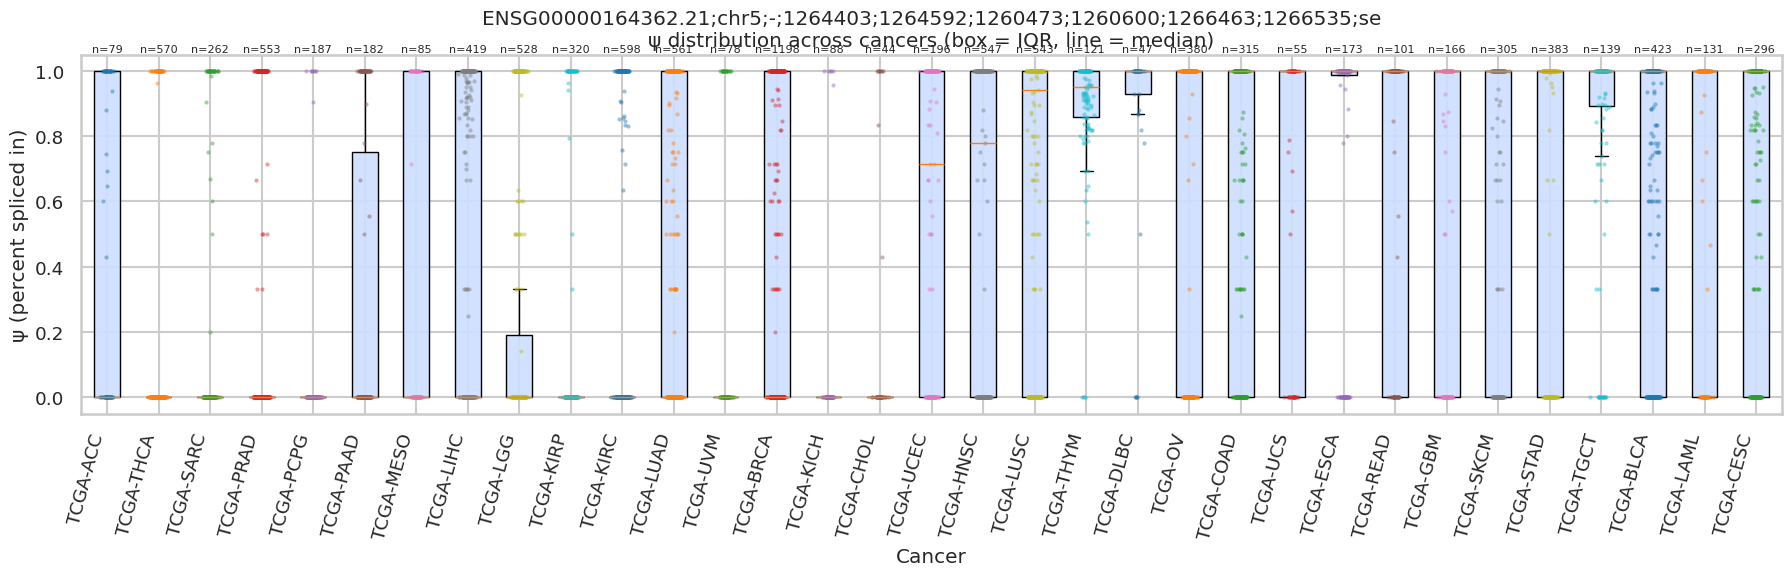

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ---- CONFIG ----
ID_COL   = "id_new"
CANCER   = "Project.ID"
PSI      = "psi"
OUTDIR   = Path("/projectnb/evolution/zwakefield/tcga/TERTsnp_yunwei/output/")

def plot_psi_by_cancer(df, event_id, outdir=OUTDIR, min_n_per_cancer=2, show=True):
    import numpy as np, pandas as pd, matplotlib.pyplot as plt
    from pathlib import Path

    ID_COL, CANCER, PSI = "id_new", "Project.ID", "psi"

    d = df.loc[df[ID_COL].astype(str) == str(event_id)].copy()
    if d.empty:
        print(f"[plot_psi_by_cancer] No rows for event: {event_id}")
        return
    d = d.replace([np.inf, -np.inf], np.nan).dropna(subset=[CANCER, PSI])
    d[PSI] = pd.to_numeric(d[PSI], errors="coerce")
    d = d.dropna(subset=[PSI])
    if d.empty:
        print(f"[plot_psi_by_cancer] All ψ missing after cleaning for {event_id}")
        return

    stats = (d.groupby(CANCER, observed=False)[PSI]
               .agg(n="size", median="median", var=lambda x: float(np.nanvar(x))))
    stats = stats.sort_values("median")
    cats = [str(c) for c in stats.index.tolist()]

    d[CANCER] = pd.Categorical(d[CANCER].astype(str), categories=cats, ordered=True)
    d = d.sort_values([CANCER])

    k = len(cats)
    fig_w = max(8.5, min(25, 0.55 * k))
    fig_h = 6.0
    fig, ax = plt.subplots(figsize=(fig_w, fig_h))

    data = [d.loc[d[CANCER] == c, PSI].to_numpy() for c in cats]
    # >>> FIXES: tick_labels + patch_artist <<<
    bp = ax.boxplot(
        data,
        tick_labels=cats,
        whis=1.5,
        showfliers=False,
        vert=True,
        patch_artist=True,  # ensures boxes are Patch objects so we can set facecolor
    )

    zero_var = set(stats.index[stats["var"] == 0].astype(str))
    for i, box in enumerate(bp["boxes"], start=1):
        lab = cats[i-1]
        if lab in zero_var:
            box.set_facecolor((0.85, 0.85, 0.85, 0.9))  # constant-ψ: light gray
        else:
            box.set_facecolor((0.80, 0.87, 1.00, 0.9))  # subtle fill
        box.set_edgecolor("black")

    # jittered points
    rng = np.random.default_rng(123)
    for i, c in enumerate(cats, start=1):
        vals = d.loc[d[CANCER] == c, PSI].to_numpy()
        if len(vals) == 0:
            continue
        x = rng.normal(loc=i, scale=0.06, size=len(vals))
        ax.plot(x, vals, 'o', ms=3, alpha=0.45, markeredgewidth=0, zorder=2)

    ax.set_ylabel("ψ (percent spliced in)")
    ax.set_xlabel("Cancer")
    ax.set_title(f"{event_id}\nψ distribution across cancers (box = IQR, line = median)")
    plt.setp(ax.get_xticklabels(), rotation=75, ha="right")

    # annotate n
    y_top = ax.get_ylim()[1]
    for i, c in enumerate(cats, start=1):
        n_i = int(stats.loc[c, "n"])
        ax.text(i, y_top, f"n={n_i}", ha="center", va="bottom", fontsize=8)

    plt.tight_layout()

    if outdir is not None:
        out_dir_evt = Path(outdir) / "".join([ch if ch.isalnum() or ch in "-._" else "_" for ch in str(event_id)])
        out_dir_evt.mkdir(parents=True, exist_ok=True)
        out_png = out_dir_evt / "psi_by_cancer.png"
        fig.savefig(out_png, dpi=200)
        print(f"[plot_psi_by_cancer] Saved: {out_png}")

    if show:
        plt.show()
    else:
        plt.close(fig)

# ---- call it for your event ----
plot_psi_by_cancer(
    LONG,
    "ENSG00000164362.21;chr5;-;1264403;1264592;1260473;1260600;1266463;1266535;se",
    outdir=OUTDIR
)
# LONG